In [1]:
import momepy as mm
import geopandas as gpd
import matplotlib.pyplot as plt 
import pandas as pd 
import os 
import libpysal
import numpy as np
import shapely
from scipy.spatial import Voronoi
from shapely.geometry.base import BaseGeometry
from shapely.ops import polygonize
from tqdm.auto import tqdm

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
path = '/home/jovyan/private/Thesis/Accra/GOB/'

In [3]:
Acc_BF = gpd.read_file(path + 'Accra_bf_hgt_V2.shp')

In [4]:
Acc_BF.shape, Acc_BF.columns

((2164987, 5),
 Index(['area_in_me', 'confidence', 'uID', 'wsf_h', 'geometry'], dtype='object'))

In [5]:
# generate tessselation using a buffer of 100m around all building footprints
limit = mm.buffered_limit(Acc_BF, 100)
tessellation = mm.Tessellation(Acc_BF, "uID", limit, verbose=False, segment=1)
tessellation = tessellation.tessellation


# Specify the absolute file path and format for the new version
output_file_path = '/home/jovyan/private/Thesis/Accra/tessellation/'

# Save the cleaned GeoDataFrame to the new file
tessellation.to_file(output_file_path + 'tessellation.shp' )

/home/jovyan/.local/lib/python3.8/site-packages/pygeos/io.py:89: UserWarning: The shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the PyGEOS GEOS version (3.10.4-CAPI-1.16.2). Conversions between both will be slow
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/momepy/elements.py:384: UserWarning: Tessellation does not fully match buildings. 8 element(s) collapsed during generation - unique_id: {2274118, 1833415, 2279439, 593568, 610599, 48497, 1747252, 2237431}
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/momepy/elements.py:395: UserWarning: Tessellation contains MultiPolygon elements. Initial objects should be edited. unique_id of affected elements: [1771350, 2073368, 277124, 1893459, 1745657, 1866594, 569072, 248671, 410402, 14449, 2237832, 1073271, 632060, 98781, 319361, 687100, 1899623, 948016, 1739467, 1889211, 127429, 1020390, 2185051, 548649, 639684, 2028797, 620959, 247504, 1146025, 218630, 1499574, 1212194, 128349, 250829, 2220747, 635084, 10

In [11]:
tessellation.head(5)

,uID,geometry
0,1441336,"POLYGON ((787361.875 605291.499, 787463.989 60..."
1,1577222,"POLYGON ((777267.492 624833.060, 777268.494 62..."
2,1390470,"POLYGON ((787344.733 605291.019, 787345.055 60..."
3,2203509,"POLYGON ((787451.306 606067.563, 787452.322 60..."
4,1525988,"POLYGON ((786678.173 611236.836, 786672.863 61..."


In [12]:
# Resetting the index to start from 0
tessellation = tessellation.reset_index(drop=True)
tessellation

,uID,geometry
0,1441336,"POLYGON ((787361.875 605291.499, 787463.989 60..."
1,1577222,"POLYGON ((777267.492 624833.060, 777268.494 62..."
2,1390470,"POLYGON ((787344.733 605291.019, 787345.055 60..."
3,2203509,"POLYGON ((787451.306 606067.563, 787452.322 60..."
4,1525988,"POLYGON ((786678.173 611236.836, 786672.863 61..."
...,...,...
2164964,246415,"POLYGON ((808092.281 635976.107, 808076.384 63..."
2164965,539245,"POLYGON ((808130.576 636022.764, 808129.256 63..."
2164966,982201,"POLYGON ((808107.669 636126.162, 808107.794 63..."
2164967,974056,"POLYGON ((808251.751 636223.307, 808250.690 63..."


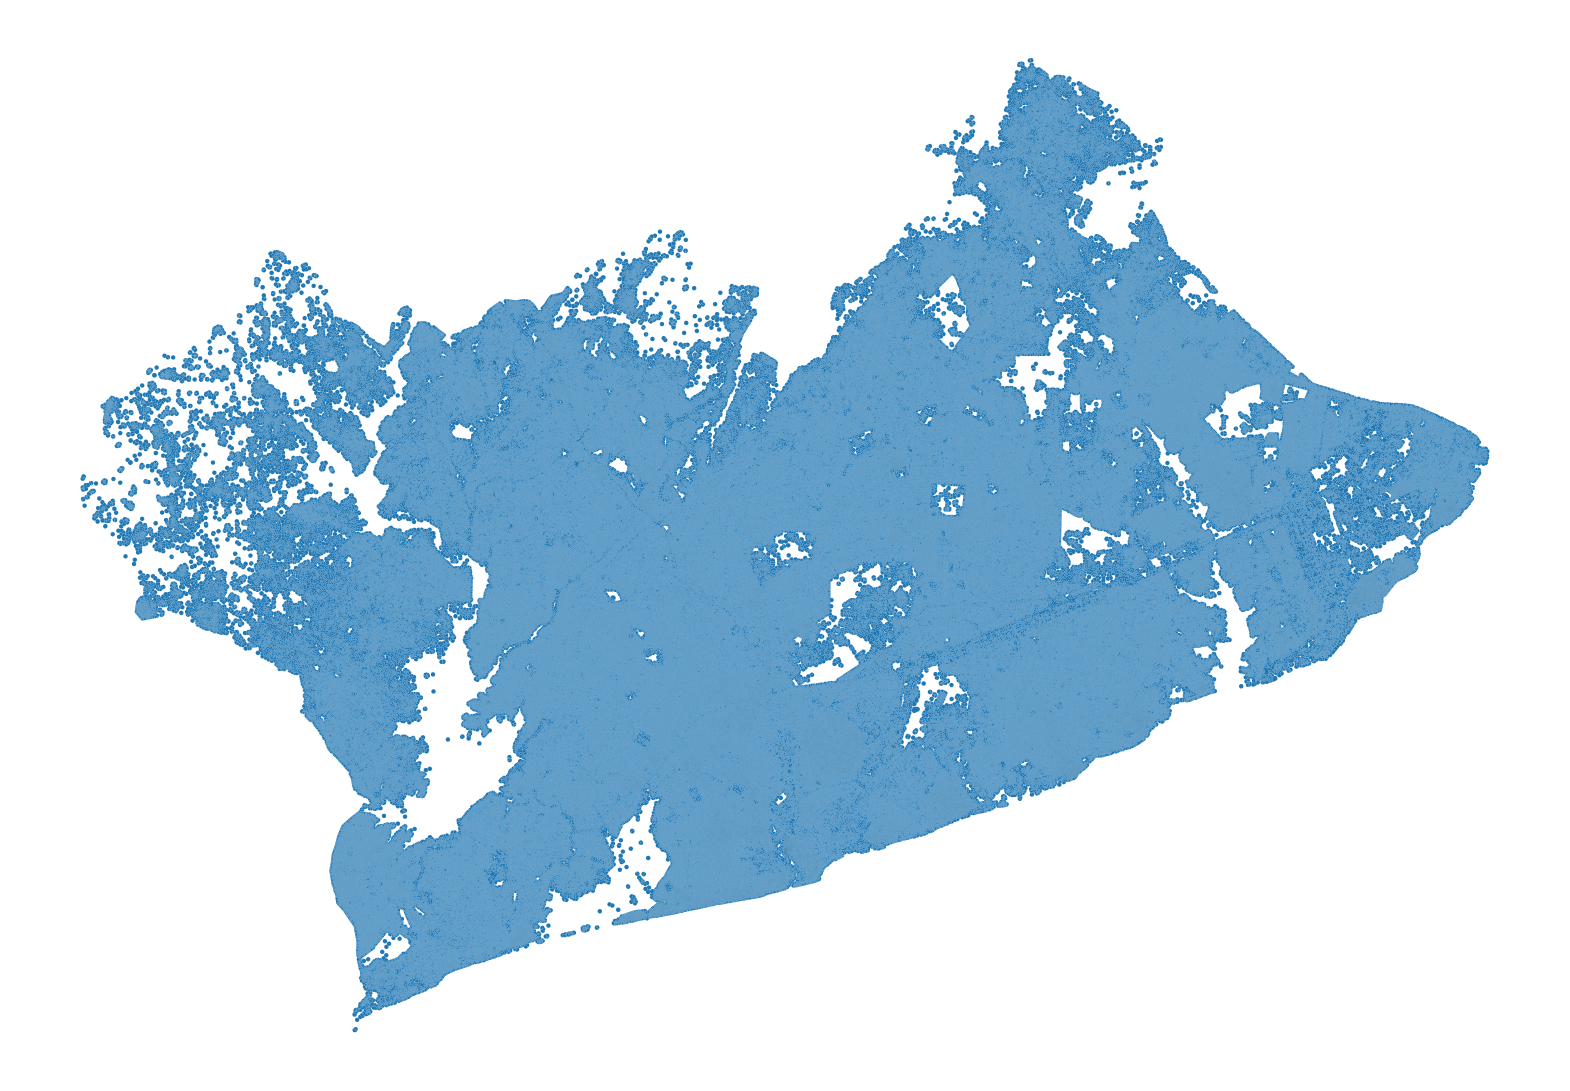

In [13]:
f, ax = plt.subplots(figsize=(20, 20))
tessellation.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [9]:
tessellation.crs

<Derived Projected CRS: EPSG:32630>
Name: WGS 84 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°W and 0°W, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Burkina Faso. Côte' Ivoire (Ivory Coast). Faroe Islands - offshore. France. Ghana. Gibraltar. Ireland - offshore Irish Sea. Mali. Mauritania. Morocco. Spain. United Kingdom (UK).
- bounds: (-6.0, 0.0, 0.0, 84.0)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
# save the cleaned version for later use and access

# Assuming gdf is your cleaned GeoDataFrame
# Specify the absolute file path and format for the new version
output_file_path = '/home/jovyan/private/Thesis/Accra/tessellation/'

# Save the cleaned GeoDataFrame to the new file
tessellation.to_file(output_file_path + 'tessellation.shp' )